In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os

# Code pour comparer 2 jets

Text(0, 0.5, 'RMSE value')

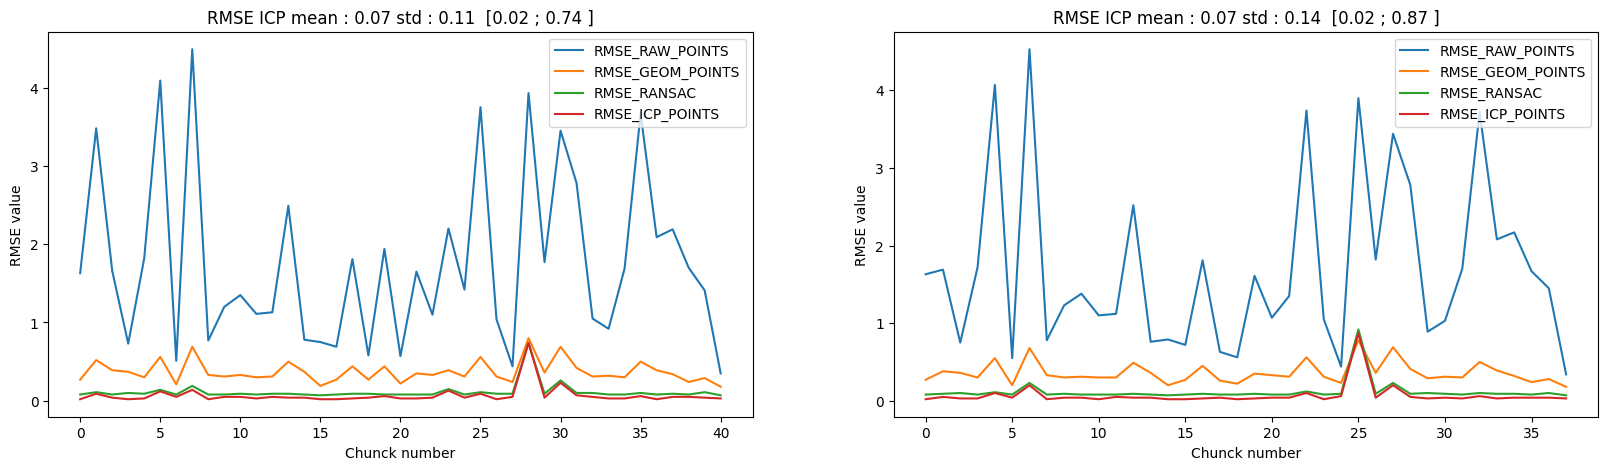

In [4]:
#take a folder path, and read all the files in it


#chemin vers les logs 1
path_folder1 = "/home/sdi-2023-01/Bureau/DATA P2P/res_18_mars/res_fourth_set_10_old_weight/log/"

#chemin vers les logs 2
path_folder2 = "/home/sdi-2023-01/Bureau/DATA P2P/res_18_mars/res_fourth_set_10_photogrammetry_weight/log/glob/"


RMSE_RAW_POINTS1 = []
RMSE_GEOM_POINTS1 = []
RMSE_RANSAC1 = []
RMSE_ICP_POINTS1 = []

RMSE_RAW_POINTS2 = []
RMSE_GEOM_POINTS2 = []
RMSE_RANSAC2 = []
RMSE_ICP_POINTS2 = []


for filename in os.listdir(path_folder1):
    with open(path_folder1 + filename, 'r') as file:
        lines = file.readlines()
        
        #1ere ligne ==> RMSE_RAW_POINTS
        RMSE_RAW_POINTS1.append(lines[0].split(" ")[-1])

        #2eme ligne ==> RMSE_GEOM_POINTS
        RMSE_GEOM_POINTS1.append(lines[1].split(" ")[-1])

        #3eme ligne ==> RMSE_RANSAC
        RMSE_RANSAC1.append(lines[2].split(" ")[-1])

        #4eme ligne ==> RMSE_ICP_POINTS
        RMSE_ICP_POINTS1.append(lines[3].split(" ")[-1])


for filename in os.listdir(path_folder2):
    with open(path_folder2 + filename, 'r') as file:
        lines = file.readlines()
        RMSE_RAW_POINTS2.append(lines[0].split(" ")[-1])
        RMSE_GEOM_POINTS2.append(lines[1].split(" ")[-1])
        RMSE_RANSAC2.append(lines[2].split(" ")[-1])
        RMSE_ICP_POINTS2.append(lines[3].split(" ")[-1])
        

#arrondir au 2eme chiffre apres la virgule
for i in range(len(RMSE_RAW_POINTS1)):
    RMSE_RAW_POINTS1[i] = round(float(RMSE_RAW_POINTS1[i]), 2)
    RMSE_GEOM_POINTS1[i] = round(float(RMSE_GEOM_POINTS1[i]), 2)
    RMSE_RANSAC1[i] = round(float(RMSE_RANSAC1[i]), 2)
    RMSE_ICP_POINTS1[i] = round(float(RMSE_ICP_POINTS1[i]), 2)

for i in range(len(RMSE_RAW_POINTS2)):
    RMSE_RAW_POINTS2[i] = round(float(RMSE_RAW_POINTS2[i]), 2)
    RMSE_GEOM_POINTS2[i] = round(float(RMSE_GEOM_POINTS2[i]), 2)
    RMSE_RANSAC2[i] = round(float(RMSE_RANSAC2[i]), 2)
    RMSE_ICP_POINTS2[i] = round(float(RMSE_ICP_POINTS2[i]), 2)


#on plot tout sur un meme graphique : subplot 1
# subplot 2 : plot RMSE_ICP_POINTS

fig, ax = plt.subplots(1,2, figsize=(20,5))

#1er subplot ; tout sur un meme graphique
ax[0].plot(RMSE_RAW_POINTS1, label="RMSE_RAW_POINTS")
ax[0].plot(RMSE_GEOM_POINTS1, label="RMSE_GEOM_POINTS")
ax[0].plot(RMSE_RANSAC1, label="RMSE_RANSAC")
ax[0].plot(RMSE_ICP_POINTS1, label="RMSE_ICP_POINTS")
ax[0].set_title("RMSE ICP mean : " + str(round(np.mean(RMSE_ICP_POINTS1), 2)) + " std : " + str(round(np.std(RMSE_ICP_POINTS1), 2)) + "  [" + str(round(np.min(RMSE_ICP_POINTS1), 2)) + " ; " + str(round(np.max(RMSE_ICP_POINTS1), 2)) + " ]")
ax[0].legend()
#xlabel
ax[0].set_xlabel("Chunck number")
ax[0].set_ylabel("RMSE value")

#2eme subplot : plot 2

ax[1].plot(RMSE_RAW_POINTS2, label="RMSE_RAW_POINTS")
ax[1].plot(RMSE_GEOM_POINTS2, label="RMSE_GEOM_POINTS")
ax[1].plot(RMSE_RANSAC2, label="RMSE_RANSAC")
ax[1].plot(RMSE_ICP_POINTS2, label="RMSE_ICP_POINTS")
ax[1].set_title("RMSE ICP mean : " + str(round(np.mean(RMSE_ICP_POINTS2), 2)) + " std : " + str(round(np.std(RMSE_ICP_POINTS2), 2)) + "  [" + str(round(np.min(RMSE_ICP_POINTS2), 2)) + " ; " + str(round(np.max(RMSE_ICP_POINTS2), 2)) + " ]")
ax[1].legend()
ax[1].set_xlabel("Chunck number")
ax[1].set_ylabel("RMSE value")



#save the plot
plt.savefig("RMSE_ICP.png")


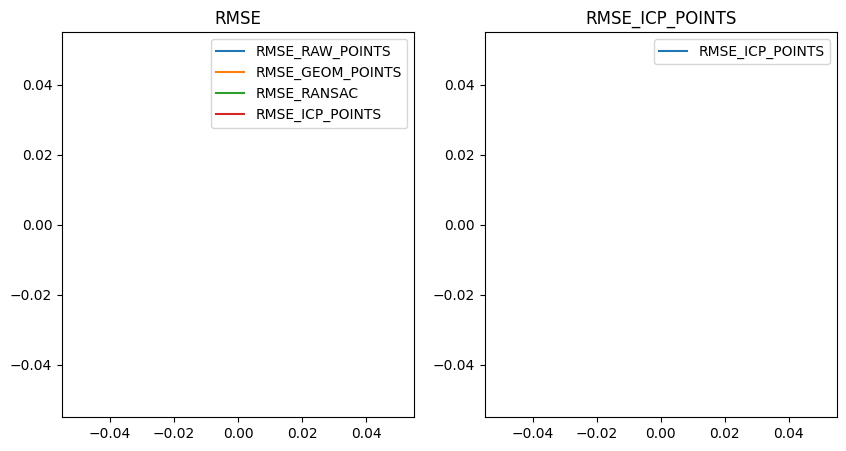